In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [6]:
# Load the dataset from the same project folder
dataset_path = "heart_attack_risk_dataset.csv"
df = pd.read_csv(dataset_path)


In [7]:
# Display basic info about the dataset
print("Dataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalass

In [8]:
# Display the first few rows to understand the structure
print("\nFirst 5 Rows of the Dataset:\n")
display(df.head())



First 5 Rows of the Dataset:



,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate



Boxplot for Outlier Detection:



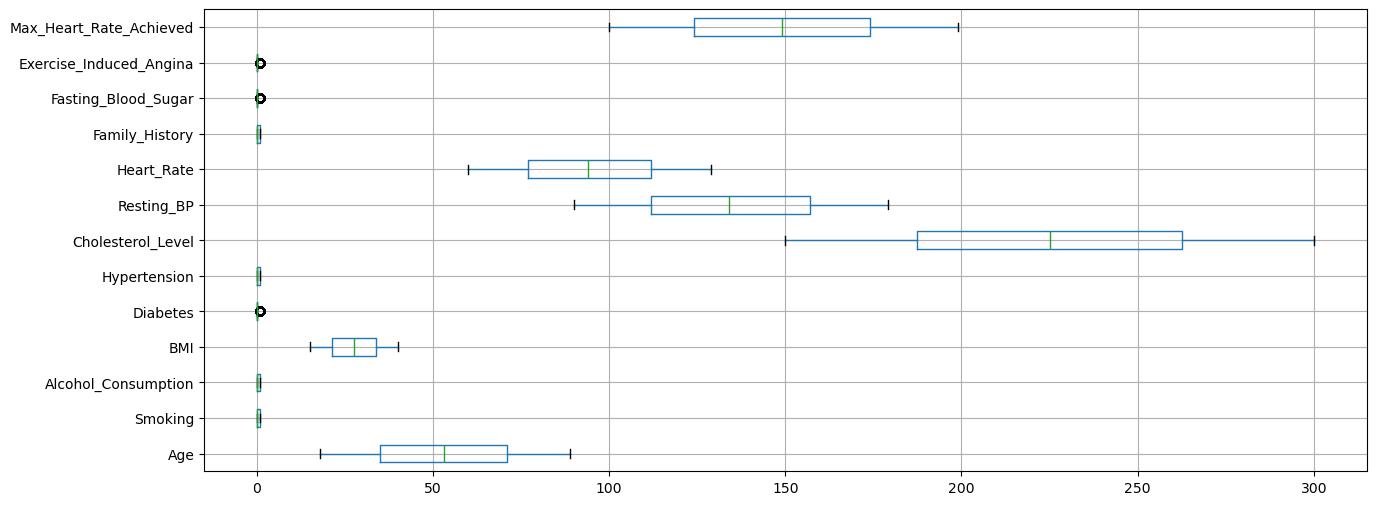

In [9]:
# Check for outliers in numerical columns
print("\nBoxplot for Outlier Detection:\n")
df.select_dtypes(include=['int64', 'float64']).boxplot(figsize=(15, 6), vert=False)
plt.show()


In [10]:
print("\nHandling Outliers:")
numerical_columns = ["Age", "BMI", "Cholesterol_Level", "Resting_BP", "Heart_Rate", "Max_Heart_Rate_Achieved"]
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print("Outliers Removed.")



Handling Outliers:
Outliers Removed.


In [11]:
#Encode categorical variables using Label Encoding
print("\nEncoding Categorical Variables:\n")
categorical_columns = ["Gender", "Physical_Activity_Level", "Stress_Level", "Chest_Pain_Type", "Thalassemia", "ECG_Results", "Heart_Attack_Risk"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoders for later use
print("Categorical Variables Encoded Successfully.")

# Verify encoding
print("\nEncoded Data Sample:\n")
display(df.head())


Encoding Categorical Variables:

Categorical Variables Encoded Successfully.

Encoded Data Sample:



,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,2,34.61,1,0,152.1,171,85,0,2,2,2,0,1,0,114,1
1,32,1,0,0,2,22.75,0,0,166.8,126,103,0,1,0,1,0,2,0,173,2
2,89,1,0,1,2,35.32,0,0,272.3,123,127,0,1,3,2,0,2,0,109,1
3,78,1,0,1,2,18.23,1,0,237.7,144,125,0,1,3,0,1,0,0,129,1
4,38,0,1,0,2,19.82,0,0,207.7,123,107,0,0,0,2,0,2,0,124,2


In [12]:
#  Scale numerical features
print("\nScaling Numerical Features:\n")
numerical_columns = ["Age", "BMI", "Cholesterol_Level", "Resting_BP", "Heart_Rate", "Max_Heart_Rate_Achieved"]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


# Verify scaling
print("\nScaled Data Sample:\n")
display(df.head())


Scaling Numerical Features:


Scaled Data Sample:



,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,0.750106,0,1,0,2,0.981390,1,0,-1.683786,1.411391,-0.472112,0,2,2,2,0,1,0,-1.224884,1
1,-1.028843,1,0,0,2,-0.660109,0,0,-1.344427,-0.325544,0.419555,0,1,0,1,0,2,0,0.822063,2
2,1.711700,1,0,1,2,1.079658,0,0,1.091110,-0.441340,1.608443,0,1,3,2,0,2,0,-1.398354,1
3,1.182823,1,0,1,2,-1.285706,1,0,0.292347,0.369230,1.509369,0,1,3,0,1,0,0,-0.704474,1
4,-0.740365,0,1,0,2,-1.065640,0,0,-0.400223,-0.441340,0.617703,0,0,0,2,0,2,0,-0.877944,2


In [13]:
X = df.drop("Heart_Attack_Risk", axis=1)
y = df["Heart_Attack_Risk"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("\nDataset Split Completed:\n")
print(f"Training Set: {len(X_train)} samples")
print(f"Validation Set: {len(X_val)} samples")
print(f"Test Set: {len(X_test)} samples")




Dataset Split Completed:

Training Set: 35000 samples
Validation Set: 7500 samples
Test Set: 7500 samples


In [14]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))


Heart_Attack_Risk
1    0.500486
2    0.298086
0    0.201429
Name: proportion, dtype: float64
Heart_Attack_Risk
1    0.500400
2    0.298133
0    0.201467
Name: proportion, dtype: float64


In [22]:
#Hyperparameter Tuning with GridSearchCV

# Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
params = {'max_iter': [100, 200, 500], 'C': [0.1, 1, 10, 100], 'fit_intercept': [True]}
logreg_grid = GridSearchCV(logreg, params, scoring='accuracy', cv=5)
logreg_grid.fit(X_train, y_train)
print("Best Logistic Regression Model:", logreg_grid.best_params_)


Best Logistic Regression Model: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100}


In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
params = {'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(dt, params, scoring='accuracy', cv=5)
dt_grid.fit(X_train, y_train)
print("Best Decision Tree Model:", dt_grid.best_params_) 

Best Decision Tree Model: {'criterion': 'gini', 'max_depth': 5}


In [32]:

# Evaluate the best models
from sklearn.metrics import accuracy_score

models = {"Logistic Regression": logreg_grid.best_estimator_, "Decision Tree": dt_grid.best_estimator_}
for name, model in models.items():
    y_pred = model.predict(X_val)
    print(f"\n{name} Validation Accuracy: {accuracy_score(y_val, y_pred):.2f}")


Logistic Regression Validation Accuracy: 0.50

Decision Tree Validation Accuracy: 0.50


In [ ]:
# Step 6: Train a Decision Tree Model
from sklearn.ensemble import RandomForestClassifier
print("\nTraining Decision Tree Model:\n")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_val)
dt_accuracy = accuracy_score(y_val, y_pred_dt)
print(f"Decision Tree Validation Accuracy: {dt_accuracy:.2f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': list(range(1, 50))}

# Perform Grid Search
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Best k value
best_k = knn_grid.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

# Train k-NN with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate performance
y_pred_best_knn = best_knn.predict(X_val)
best_knn_accuracy = accuracy_score(y_val, y_pred_best_knn)
print(f"Best k-NN Validation Accuracy: {best_knn_accuracy:.2f}")


In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))


In [ ]:
#Display Classification Report & Confusion Matrix
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_val, y_pred))